In [116]:
import pandas as pd
import matplotlib.pyplot as plt


In [117]:
s21fe = pd.read_csv("dataset/s21fe_data.csv")
pixel6a = pd.read_csv("dataset/pixel_6a.csv")
a70 = pd.read_csv("dataset/samsung_a70.csv")


In [118]:
s21fe.loc[s21fe["battery_percent"] == 100].shape


(143, 9)

In [119]:
pixel6a.loc[pixel6a["battery_percent"] == 100].shape

(303, 9)

In [120]:
a70.loc[a70["battery_percent"] == 100].shape

(7, 9)

In [121]:
s21fe["timestamp"] = pd.to_datetime(s21fe["timestamp"])
a70["timestamp"] = pd.to_datetime(a70["timestamp"])
pixel6a["timestamp"] = pd.to_datetime(pixel6a["timestamp"])


In [122]:
s21fe.head()

,timestamp,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh),battery_technology
0,2023-04-13 13:05:45.846,3.36,1595,5.35920,1,37.1,0.0,4370,Li-ion
1,2023-04-13 13:05:47.004,3.36,1434,4.81824,1,37.1,0.0,4370,Li-ion
2,2023-04-13 13:05:48.050,3.36,565,1.89840,1,37.1,0.0,4370,Li-ion
3,2023-04-13 13:05:49.085,3.36,1654,5.55744,1,37.1,0.0,4370,Li-ion
4,2023-04-13 13:05:50.110,3.36,884,2.97024,1,37.1,0.0,4370,Li-ion


S21 FE

Text(0, 0.5, 'Current (mA)')

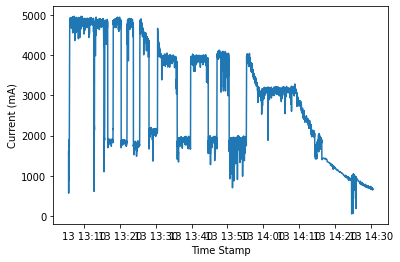

In [123]:
x = s21fe["timestamp"]
y = s21fe["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Current (mA)")

Text(0, 0.5, 'Voltage(V)')

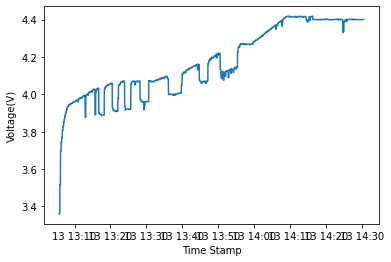

In [124]:
x = s21fe["timestamp"]
y = s21fe["voltage(V)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Voltage(V)")

Text(0, 0.5, 'Power(W)')

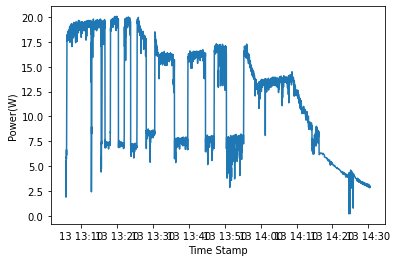

In [125]:
x = s21fe["timestamp"]
y = s21fe["power(W)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Power(W)")

Text(0, 0.5, 'temperature(Celsius)')

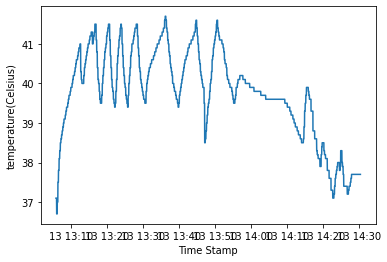

In [126]:
x = s21fe["timestamp"]
y = s21fe["battery_temperature(Celsius)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("temperature(Celsius)")

Text(0, 0.5, 'Battery level')

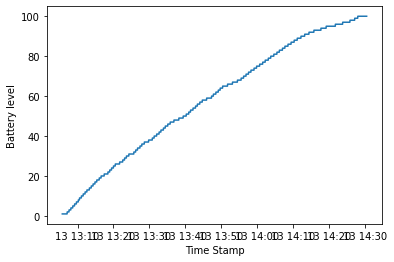

In [127]:
x = s21fe["timestamp"]
y = s21fe["battery_percent"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Battery level")

Samsung A70

Text(0, 0.5, 'Current (mA)')

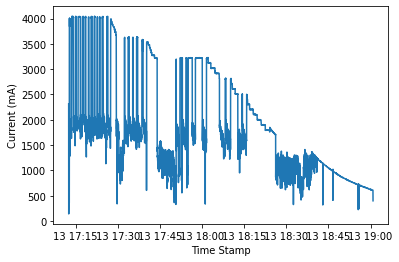

In [128]:
x = a70["timestamp"]
y = a70["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Current (mA)")

Pixel 6A

Text(0, 0.5, 'Current (mA)')

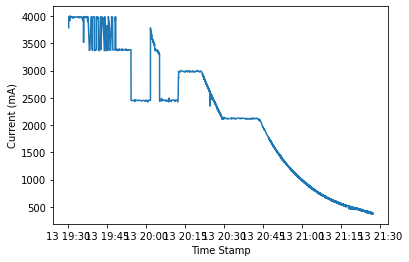

In [129]:
x = pixel6a["timestamp"]
y = pixel6a["current(mA)"]
plt.plot(x, y)
plt.xlabel("Time Stamp")
plt.ylabel("Current (mA)")

Shape of all three phones

In [130]:
pixel6a.shape

(3332, 9)

In [131]:
a70.shape

(4686, 9)

In [132]:
s21fe.shape

(4464, 9)

In [133]:
print("A70 Max Temp", a70["battery_temperature(Celsius)"].max())
print("S21FE Max Temp", s21fe["battery_temperature(Celsius)"].max())
print("Pixel 6A Max Temp", pixel6a["battery_temperature(Celsius)"].max())


A70 Max Temp 40.1
S21FE Max Temp 41.7
Pixel 6A Max Temp 42.7


Correlation

In [137]:
pixel6a.corr()

,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.868765,-0.841552,0.961953,-0.725914,0.964408,NaN
current(mA),-0.868765,1.000000,0.998412,-0.943624,0.925130,-0.939750,NaN
power(W),-0.841552,0.998412,1.000000,-0.925999,0.938359,-0.921439,NaN
battery_percent,0.961953,-0.943624,-0.925999,1.000000,-0.817088,0.999553,NaN
battery_temperature(Celsius),-0.725914,0.925130,0.938359,-0.817088,1.000000,-0.812513,NaN
remaining_battery_charge(mAh),0.964408,-0.939750,-0.921439,0.999553,-0.812513,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [138]:
a70.corr()

,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,0.088772,0.143112,0.796245,0.622724,0.794243,NaN
current(mA),0.088772,1.000000,0.998250,-0.492034,0.179417,-0.497655,NaN
power(W),0.143112,0.998250,1.000000,-0.442711,0.222917,-0.448636,NaN
battery_percent,0.796245,-0.492034,-0.442711,1.000000,0.547542,0.999432,NaN
battery_temperature(Celsius),0.622724,0.179417,0.222917,0.547542,1.000000,0.532167,NaN
remaining_battery_charge(mAh),0.794243,-0.497655,-0.448636,0.999432,0.532167,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [139]:
s21fe.corr()

,voltage(V),current(mA),power(W),battery_percent,battery_temperature(Celsius),remaining_battery_charge(mAh),battery_capacity(mAh)
voltage(V),1.000000,-0.387511,-0.311557,0.926127,-0.432842,0.926291,NaN
current(mA),-0.387511,1.000000,0.995779,-0.635516,0.411069,-0.636134,NaN
power(W),-0.311557,0.995779,1.000000,-0.569778,0.407685,-0.570358,NaN
battery_percent,0.926127,-0.635516,-0.569778,1.000000,-0.467203,0.999941,NaN
battery_temperature(Celsius),-0.432842,0.411069,0.407685,-0.467203,1.000000,-0.465893,NaN
remaining_battery_charge(mAh),0.926291,-0.636134,-0.570358,0.999941,-0.465893,1.000000,NaN
battery_capacity(mAh),NaN,NaN,NaN,NaN,NaN,NaN,NaN
